## Imports

In [11]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## MSE Function

In [12]:
def calc_mse(im1, im2):
    err = np.sum((im1.astype("float") - im2.astype("float")) ** 2)
    err /= float(im1.shape[0] * im1.shape[1])
    
    return err

## Settings

In [13]:
im1_dir = '/home/drevital/obstacles_classification_datasets/rgb_6_H/eval/obstacle'
im1_name = '117_1226__enhanced__contrast_2.jpg'
im2_dir = '/home/drevital/obstacles_classification_datasets/rgb_6_H/train/no_obstacle'
im2_name = '117_1366_.87_2021-08-16--11-34-50_.jpg'
im_height = 200
im_width = 400

## Read Images

In [14]:
im1_rgb = cv2.imread(os.path.join(im1_dir, im1_name))
im1 = cv2.cvtColor(im1_rgb, cv2.COLOR_BGR2RGB) 
im2_rgb = cv2.imread(os.path.join(im2_dir, im2_name))
im2 = cv2.cvtColor(im2_rgb, cv2.COLOR_BGR2RGB) 

## Prepare Images for Compaison

In [15]:
#im1 = cv2.resize(im1,
#                 dsize=(im_width, im_height),
#                 interpolation=cv2.INTER_LINEAR)
#im2 = cv2.resize(im2,
#                 dsize=(im_width, im_height),
#                 interpolation=cv2.INTER_LINEAR)
im1 = cv2.resize(im1,
                 dsize=(im_width, im_height),
                 interpolation=cv2.BORDER_WRAP)
im2 = cv2.resize(im2,
                 dsize=(im_width, im_height),
                 interpolation=cv2.BORDER_WRAP)

# Take the right half of each image
im1 = np.array(im1, dtype='float32')
w = im1.shape[1]
im1 = im1[:, w//2:]
im1 /= 255.0

im2 = np.array(im2, dtype='float32')
w = im2.shape[1]
im2 = im2[:, w//2:]
im2 /= 255.0

## Find Similarity

In [16]:
similarity = ssim(im1, im2, multichannel=True)
mse = calc_mse(im1, im2)

## Display Images

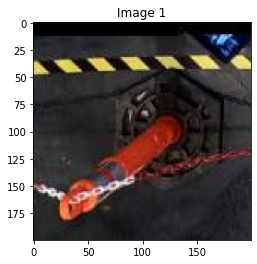

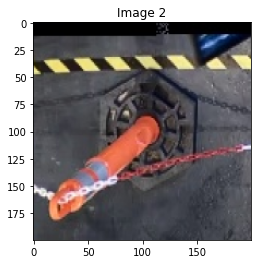

In [17]:
plt.imshow(im1)
plt.title('Image 1')
plt.show() 
plt.imshow(im2)
plt.title('Image 2')
plt.show() 

In [18]:
similarity, mse

(0.45046885932057906, 0.1549573353302624)